In [355]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn 
import matplotlib.pyplot as plt
import scipy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import * 
from sklearn.svm import SVC

In [356]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [357]:
print(str(len(titanic_data.index)))

891


<Axes: xlabel='Survived', ylabel='count'>

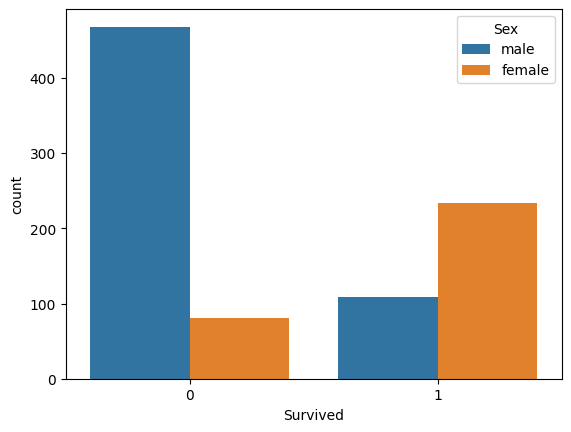

In [358]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

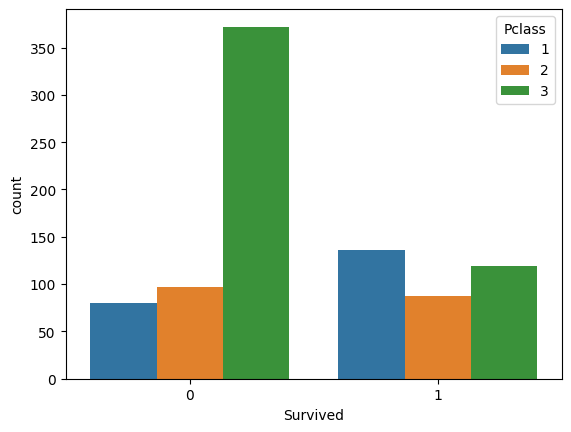

In [359]:
sns.countplot(x='Survived',hue='Pclass',data = titanic_data)

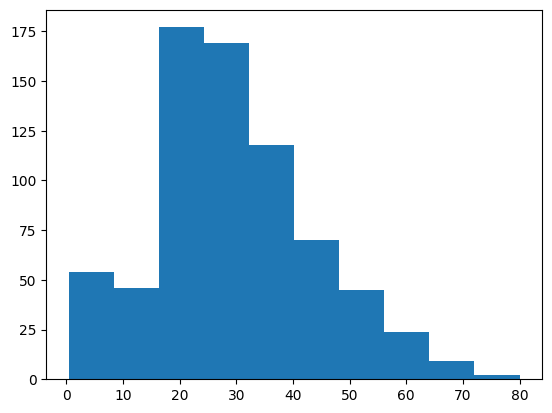

In [360]:
plt.hist(titanic_data['Age'])
plt.show()

<Axes: ylabel='Frequency'>

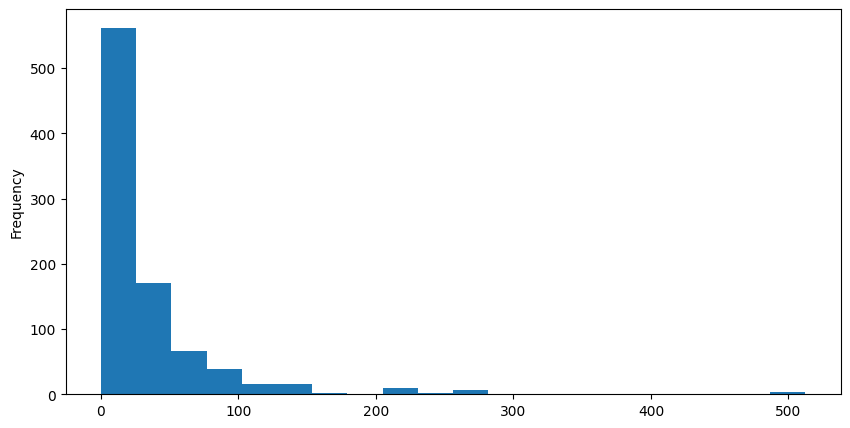

In [361]:
#plt.hist(titanic_data['Fare'],figsize=(10,5),bins=20)
titanic_data['Fare'].plot.hist(figsize=(10,5),bins=20)
# plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

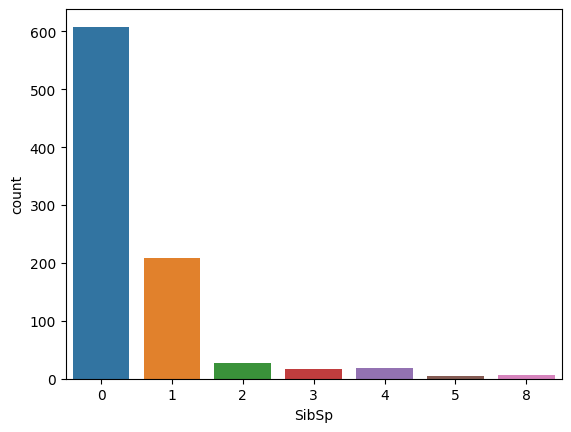

In [362]:
sns.countplot(x='SibSp',data = titanic_data)

In [363]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [364]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

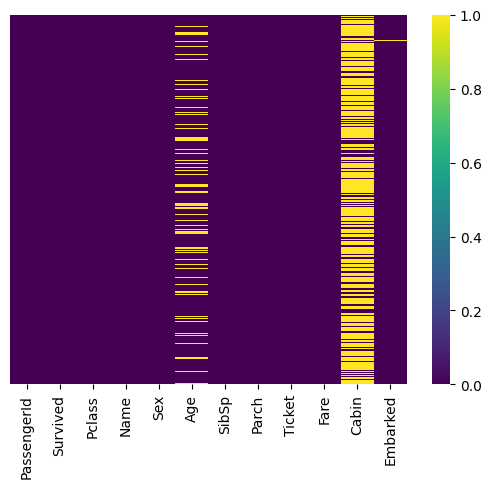

In [365]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

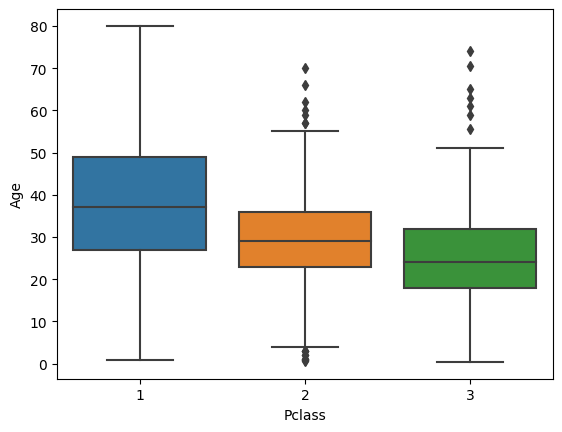

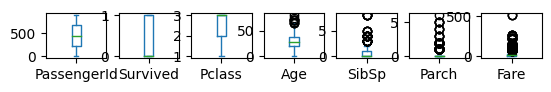

In [366]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

titanic_data.plot(kind='box',subplots = True, layout = (7,7), sharex = False, sharey = False)
plt.show()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

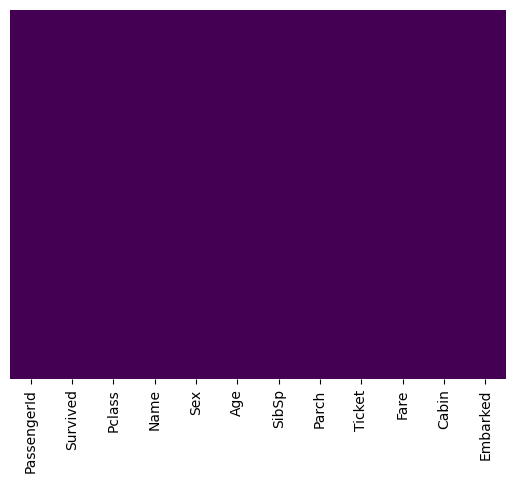

In [367]:
titanic_data.drop('Cabin',axis=1,inplace=True)

titanic_data.dropna(inplace=True)

sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

titanic_data.isnull().sum()

In [368]:
sex =pd.get_dummies(titanic_data['Sex'],drop_first=True)


In [369]:
embarked = result =pd.get_dummies(titanic_data['Embarked'],drop_first=True)
result.head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [370]:
result =pd.get_dummies(titanic_data['Embarked'],drop_first=True)
result.head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [371]:
pcl =pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head()

,2,3
1,False,False
3,False,False
6,False,False
10,False,True
11,False,False


In [372]:
titanic_data =pd.concat([titanic_data,sex,embarked,pcl],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,True,False,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,True,False,False


In [373]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,1,1,38.0,1,0,71.2833,C85,False,False,False,False,False
3,1,1,35.0,1,0,53.1000,C123,False,False,True,False,False
6,0,1,54.0,0,0,51.8625,E46,True,False,True,False,False
10,1,3,4.0,1,1,16.7000,G6,False,False,True,False,True
11,1,1,58.0,0,0,26.5500,C103,False,False,True,False,False


In [374]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [375]:
# x = titanic_data.drop('Survived',axis=1)
x=titanic_data[['Age','Fare']]
#x=titanic_data['Age'].values.reshape(-1,1)
y = titanic_data['Survived'].values.reshape(-1,1)

In [376]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=1)

Lg = LogisticRegression()

Lg.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [377]:
y_pred = Lg.predict(x_test)

mean_squared_error(y_test,y_pred)


0.2545454545454545

In [378]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.24      0.36        17\n           1       0.74      0.97      0.84        38\n\n    accuracy                           0.75        55\n   macro avg       0.77      0.60      0.60        55\nweighted avg       0.76      0.75      0.69        55\n'

In [379]:
confusion_matrix(y_test,y_pred)

array([[ 4, 13],
       [ 1, 37]], dtype=int64)

In [380]:
accuracy_score(y_test,y_pred)

0.7454545454545455